In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [28]:
data = pd.read_csv(r'C:\Users\Saloni Bansal\Downloads\archive (1)\diabetes_prediction_dataset.csv')


In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()   # the process of converting data from categorial from numerical data is called encoding.

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data['gender']=data['gender'].map({'Male':1, 'Female':2, 'Other':3})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 6.9+ MB


In [8]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
data['smoking_history']=data['smoking_history'].map({'never':1, 'current':2, 'No Info':3,'former':4,'ever':5,'not current':6})

In [10]:
data.info()  # here we are converting gender and smoking_history tupe from object to gloat that converting it from caterorical to numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [11]:
data['smoking_history'].unique()

array([1, 3, 2, 4, 5, 6], dtype=int64)

In [12]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585880,41.885856,0.07485,0.039420,2.572250,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,1.465477,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,3.000000,29.580000,6.200000,159.000000,0.000000
max,3.000000,80.000000,1.00000,1.000000,6.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

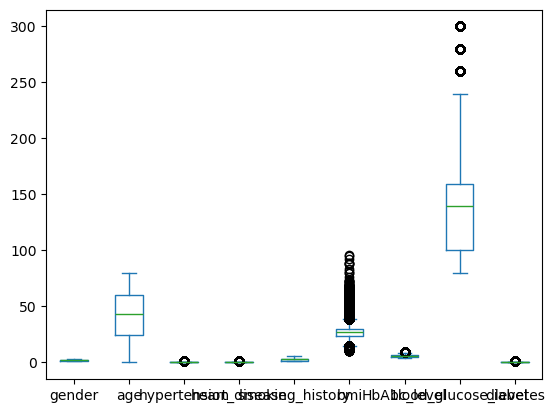

In [13]:
#sns.boxplot('feature')
data.plot(kind='box')

<Axes: xlabel='bmi'>

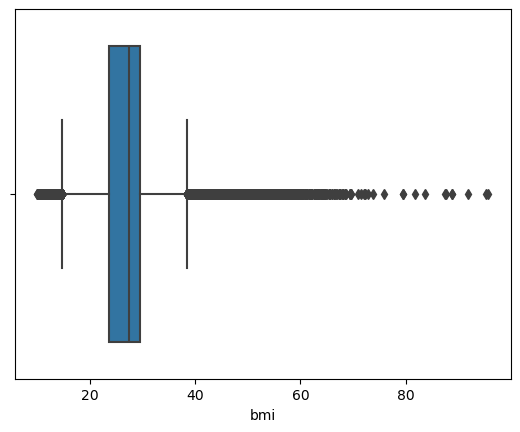

In [14]:
sns.boxplot(x='bmi', data=data) # this shows bmi has highest outliers 

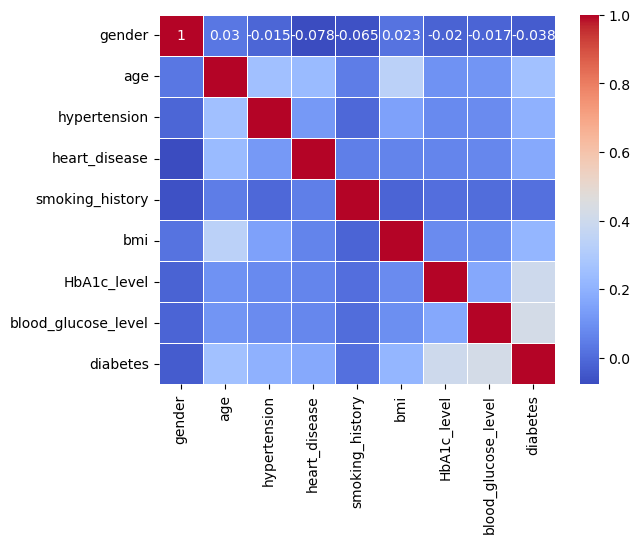

In [15]:
corr_matrix = data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.show()

In [16]:
y=data['diabetes']
data.drop('diabetes',axis=1,inplace=True)
x=data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [20]:
Y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,roc_curve,auc,precision_score, recall_score

In [22]:
print('Accuracy: ', accuracy_score(Y_test,Y_pred))

Accuracy:  0.96005


In [23]:
confusion_matrix(Y_test,Y_pred)

array([[18121,   166],
       [  633,  1080]], dtype=int64)

In [24]:
f1_score(Y_test,Y_pred)

0.7299763433592431

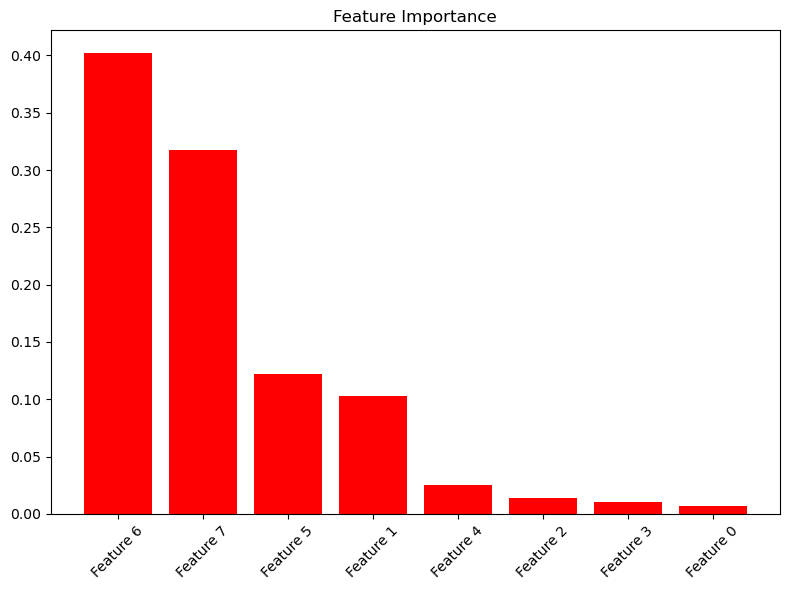

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]
features = [f'Feature {i}' for i in range(X_train.shape[1])]

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.bar(range(x.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import pickle
diabetes='model.pkl'
with open(diabetes,'wb') as f:
    pickle.dump(model,f)